In [156]:

import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as  pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

import joblib

In [157]:
df = pd.read_csv('kidney_disease.csv')
df.shape

(400, 26)

In [158]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [159]:
#create a list of column names to keep
columns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'classification']
#Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis = 1)

#Drop the rows with na or missing values
df = df.dropna(axis=0)

In [160]:
df.shape

(287, 7)

In [161]:
#Transform the non- numeric data in the columns, Label encondig
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform( df[column] )

<ipython-input-161-d138216f1a7c>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-161-d138216f1a7c>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-161-d138216f1a7c>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [162]:
encoded_values = df['classification'].unique()
print(encoded_values)


[0 1]


In [163]:
#Printing the first 5rows of the cleaned dta
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [164]:
#Split the data into independent (X) data set (the features) and dependent (y) data set (the target)
X = df.drop(['classification'], axis = 1)
y = df['classification']

In [165]:
#Feature Scaling
#min-max scaler method scales the data so that all the input features lie between o and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names  = X.columns
X[column_names] = x_scaler.transform(X)

In [166]:
#Split the data into 80% trainig and 20% testing & shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True)


In [167]:
# Build the model
model = Sequential()
model.add(Dense(256, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Change activation to 'sigmoid' for binary classification

In [168]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [169]:
# train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=X_train.shape[0], verbose=1)

Epoch 1/200
1/1 [==============================] - 1s 805ms/step - loss: 0.6988 - accuracy: 0.5050 - val_loss: 0.6888 - val_accuracy: 0.6092
Epoch 2/200
1/1 [==============================] - 0s 38ms/step - loss: 0.6894 - accuracy: 0.5550 - val_loss: 0.6792 - val_accuracy: 0.7011
Epoch 3/200
1/1 [==============================] - 0s 40ms/step - loss: 0.6801 - accuracy: 0.6700 - val_loss: 0.6698 - val_accuracy: 0.7701
Epoch 4/200
1/1 [==============================] - 0s 36ms/step - loss: 0.6711 - accuracy: 0.7750 - val_loss: 0.6605 - val_accuracy: 0.8391
Epoch 5/200
1/1 [==============================] - 0s 39ms/step - loss: 0.6622 - accuracy: 0.7950 - val_loss: 0.6515 - val_accuracy: 0.8506
Epoch 6/200
1/1 [==============================] - 0s 37ms/step - loss: 0.6536 - accuracy: 0.8250 - val_loss: 0.6428 - val_accuracy: 0.8621
Epoch 7/200
1/1 [==============================] - 0s 57ms/step - loss: 0.6451 - accuracy: 0.8450 - val_loss: 0.6341 - val_accuracy: 0.8621
Epoch 8/200
1/1 [==

In [170]:
# Calculate and print the accuracy of the Neural Network
#nn_accuracy = model.evaluate(X_test, y_test)[1]
#print(f'Neural Network Accuracy: {nn_accuracy}')
# Calculate and print the accuracy of the Neural Network on test data
nn_loss, nn_accuracy = model.evaluate(X_test, y_test)
print(f'Neural Network Accuracy: {nn_accuracy}')



3/3 [==============================] - 0s 5ms/step - loss: 0.0898 - accuracy: 0.9770
Neural Network Accuracy: 0.977011501789093


In [202]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test data
#y_pred = model.evaluate(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


NameError: ignored

In [171]:
#Save the model
model.save('ckd.model')

Text(0.5, 0, 'epoch')

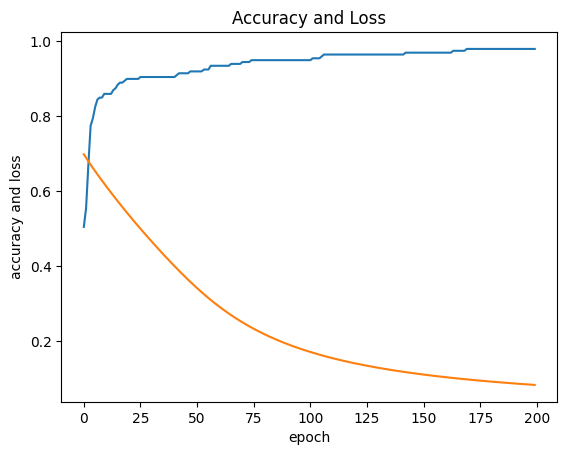

In [172]:
#Visualize the model loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy and Loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')

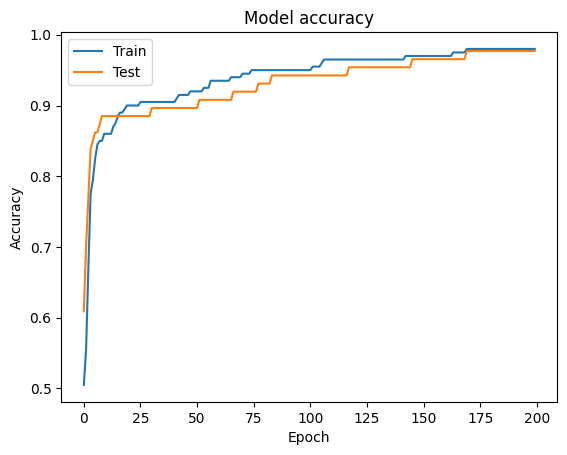

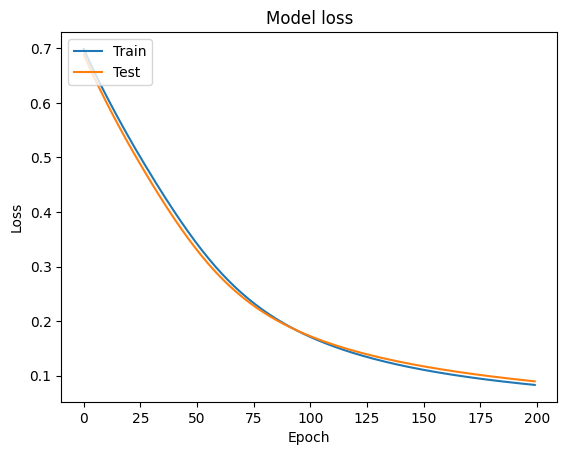

In [173]:
# Assuming you have already trained your neural network and stored the training history in 'history'

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


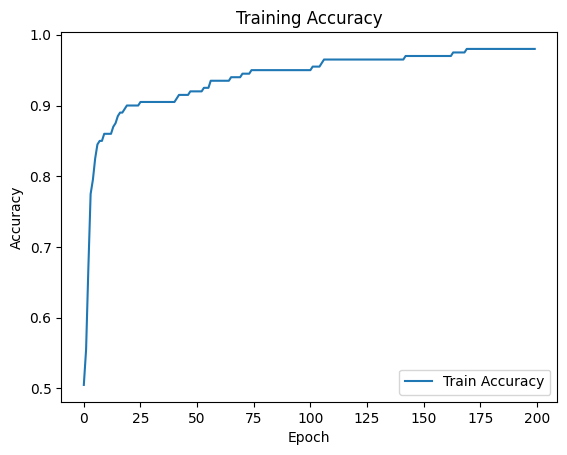

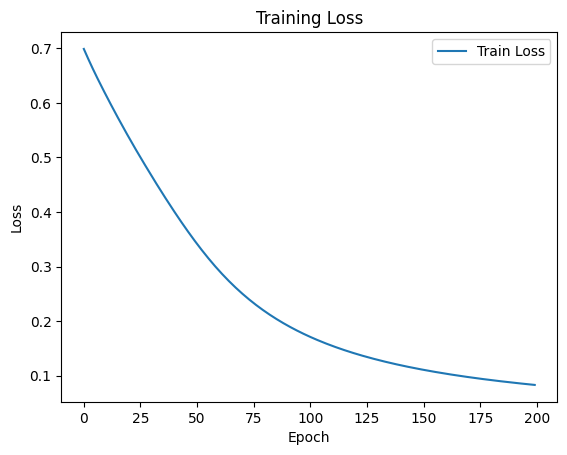

In [174]:
# Assuming you have already trained your neural network and stored the training history in 'history'

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [175]:

from sklearn.metrics import confusion_matrix

In [176]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    classes = ['Not CKD', 'CKD']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [177]:
#Get the shape of the training and test data
print('shape of Training data', X_train.shape)
print('shape of test data', X_test.shape )

shape of Training data (200, 6)
shape of test data (87, 6)


In [178]:
#Show the actual and predicted values
pred = model.predict(X_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred



print('Original Values : {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted Values : {0}'.format(",".join(str(x) for x in pred)))

3/3 [==============================] - 0s 3ms/step
Original Values : 0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0
Predicted Values : 0,0,1,0,1,0,0,1,0,1,1,1,0,0,1,1,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0


3/3 [==============================] - 0s 4ms/step


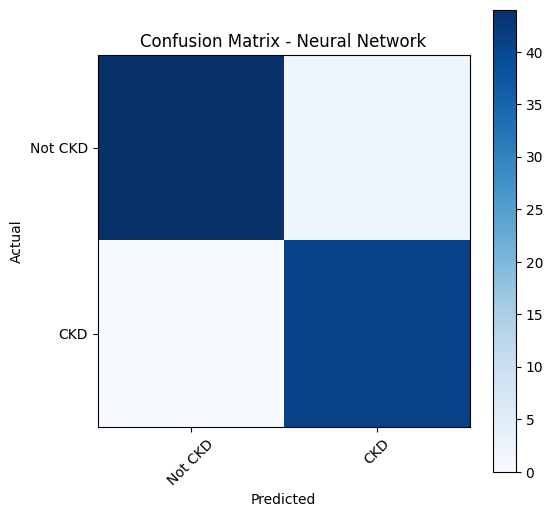

In [179]:
nn_pred = [1 if y >= 0.5 else 0 for y in model.predict(X_test)]
plot_confusion_matrix(y_test, nn_pred, 'Confusion Matrix - Neural Network')

In [180]:
from sklearn.ensemble import RandomForestClassifier

Random Forest Accuracy: 1.0
Feature sg importance: 0.1815541031227306
Feature al importance: 0.0
Feature sc importance: 0.0
Feature hemo importance: 0.8184458968772694
Feature pcv importance: 0.0
Feature htn importance: 0.0


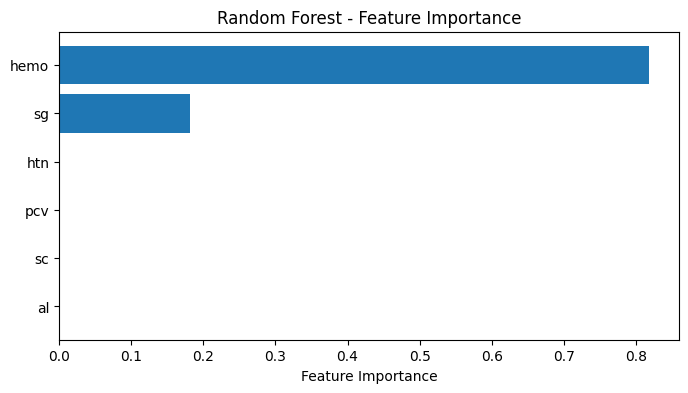

In [212]:
# Build and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=1, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
rf_accuracy = rf_model.score(X_test, y_test)

# Show the accuracy
print('Random Forest Accuracy:', rf_accuracy)


joblib.dump(rf_model, 'adaboost_model.pkl')

# You can also print feature importances
feature_importances = rf_model.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f'Feature {X.columns[i]} importance: {importance}')



    import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model

# Get the names of the features
feature_names = X.columns

# Sort the features by importance
sorted_idx = feature_importances.argsort()

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Random Forest - Feature Importance')
plt.show()


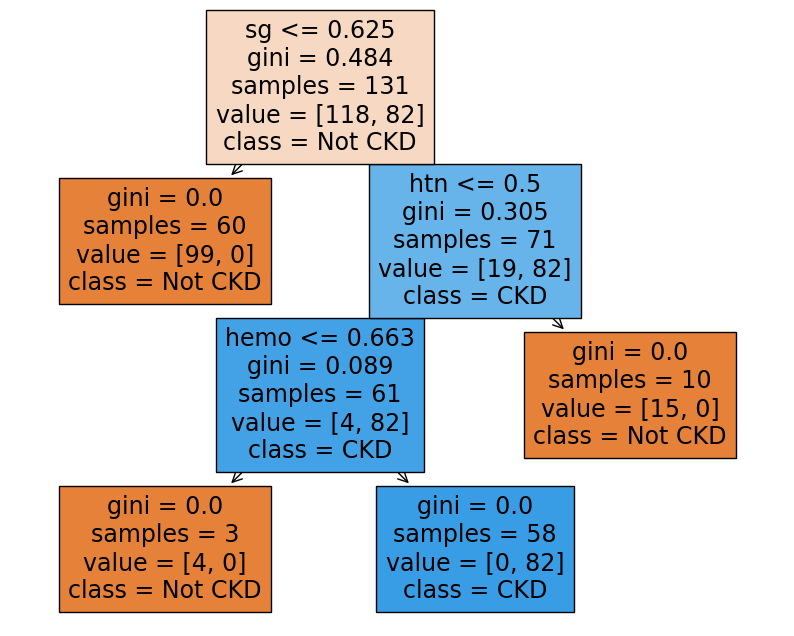

In [182]:
from sklearn.tree import plot_tree

# Assuming rf_model is your trained Random Forest model
# Access one of the trees (for example, the first tree)
tree_to_visualize = rf_model.estimators_[56]

# Plot the first tree
plt.figure(figsize=(10, 8))
plot_tree(tree_to_visualize, feature_names=X.columns, filled=True, class_names=["Not CKD", "CKD"])
plt.show()


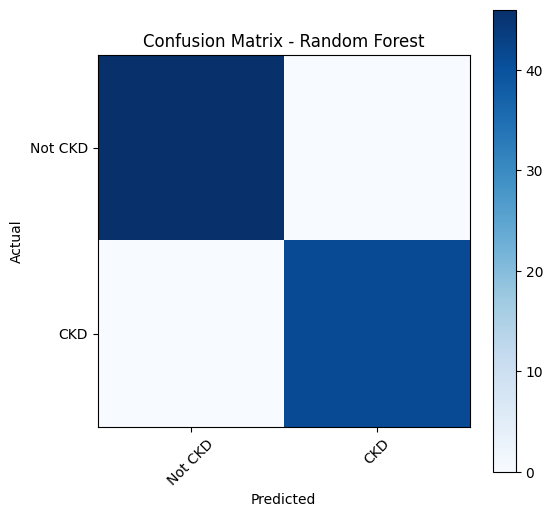

In [183]:
rf_pred = rf_model.predict(X_test)
plot_confusion_matrix(y_test, rf_pred, 'Confusion Matrix - Random Forest')

In [184]:
from sklearn.ensemble import GradientBoostingClassifier

Gradient Boosting Accuracy: 1.0
Feature sg importance: 0.22019093140950458
Feature al importance: 0.0
Feature sc importance: 0.0
Feature hemo importance: 0.7403496624545576
Feature pcv importance: 0.0
Feature htn importance: 0.03945940613593785


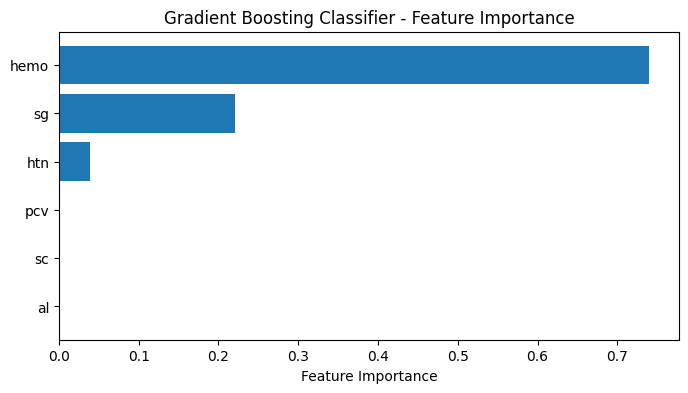

In [209]:
# Build and train the Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
gb_accuracy = gb_model.score(X_test, y_test)

# Show the accuracy
print('Gradient Boosting Accuracy:', gb_accuracy)

#saving the model

joblib.dump(gb_model, 'adaboost_model.pkl')

# Optionally, you can print feature importances
feature_importances = gb_model.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f'Feature {X.columns[i]} importance: {importance}')



# Get the names of the features
feature_names = X.columns

# Sort the features by importance
sorted_idx = feature_importances.argsort()

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Classifier - Feature Importance')
plt.show()

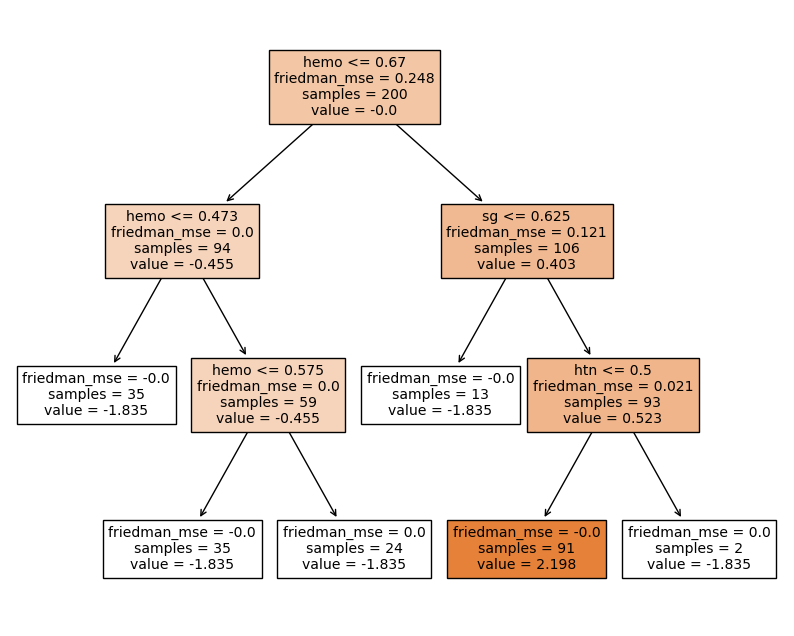

In [186]:
from sklearn.tree import plot_tree

# Assuming gb_model is your trained Gradient Boosting model
# Access one of the trees (for example, the first tree)
tree_to_visualize = gb_model.estimators_[0][0]

# Plot the first tree
plt.figure(figsize=(10, 8))
plot_tree(tree_to_visualize, feature_names=X.columns, filled=True, class_names=["Not CKD", "CKD"])
plt.show()


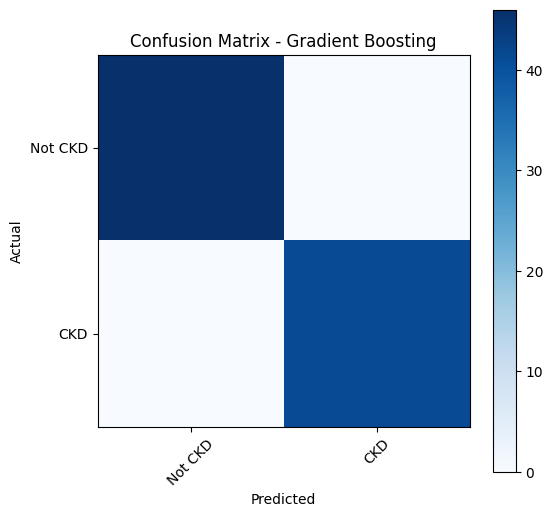

In [187]:
gb_pred = gb_model.predict(X_test)
plot_confusion_matrix(y_test, gb_pred, 'Confusion Matrix - Gradient Boosting')

In [188]:
from sklearn.ensemble import AdaBoostClassifier


AdaBoost Accuracy: 0.9080459770114943
Feature sg importance: 0.0
Feature al importance: 0.0
Feature sc importance: 0.0
Feature hemo importance: 1.0
Feature pcv importance: 0.0
Feature htn importance: 0.0


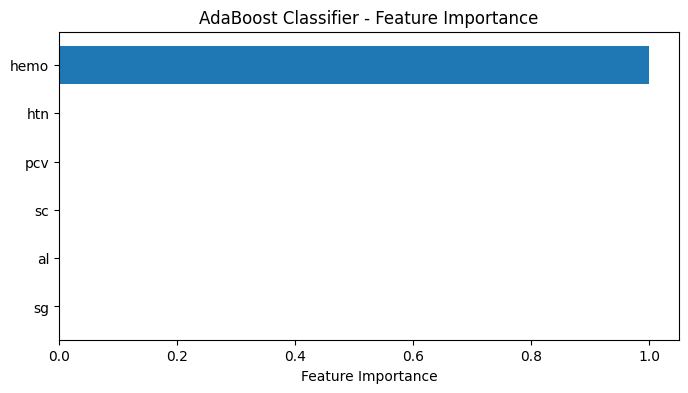

In [189]:
# Build and train the AdaBoost classifier
ab_model = AdaBoostClassifier(n_estimators=1, random_state=42)
ab_model.fit(X_train, y_train)

# Evaluate the model
ab_accuracy = ab_model.score(X_test, y_test)

# Show the accuracy
print('AdaBoost Accuracy:', ab_accuracy)
#Saving the model
joblib.dump(ab_model, 'adaboost_model.pkl')

# Optionally, you can print feature importances
feature_importances = ab_model.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f'Feature {X.columns[i]} importance: {importance}')



#     Get the names of the features
feature_names = X.columns

# Sort the features by importance
sorted_idx = feature_importances.argsort()

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importance')
plt.show()

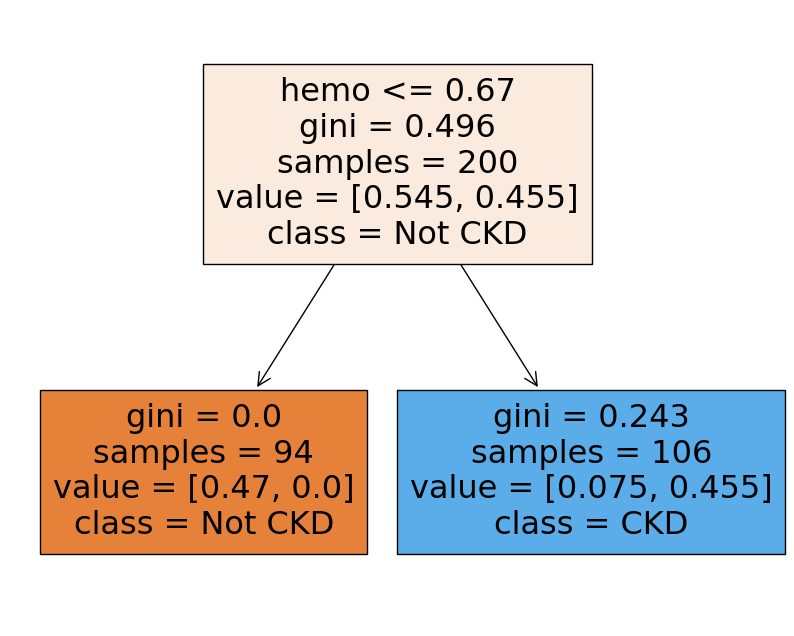

In [190]:
from sklearn.tree import plot_tree

# Assuming ab_model is your trained AdaBoost model
# Access one of the base estimators (trees)
tree_to_visualize = ab_model.estimators_[0]

# Plot the first tree
plt.figure(figsize=(10, 8))
plot_tree(tree_to_visualize, feature_names=X.columns, filled=True, class_names=["Not CKD", "CKD"])
plt.show()


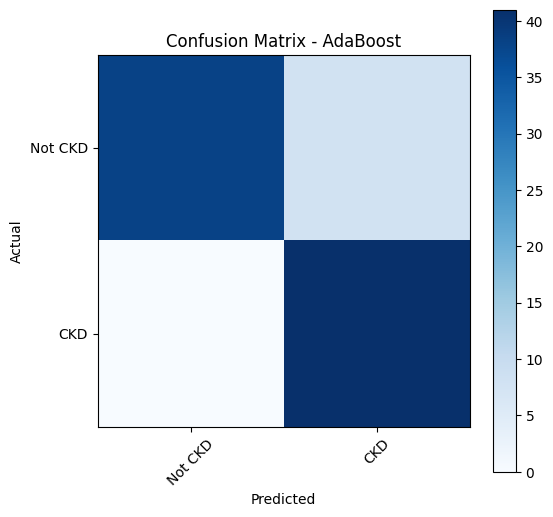

In [191]:
ab_pred = ab_model.predict(X_test)
plot_confusion_matrix(y_test, ab_pred, 'Confusion Matrix - AdaBoost')

In [192]:
!pip install catboost


0:	learn: 0.6259694	total: 2.2ms	remaining: 19.8ms
1:	learn: 0.5748478	total: 3.6ms	remaining: 14.4ms
2:	learn: 0.5282303	total: 4.86ms	remaining: 11.3ms
3:	learn: 0.4776464	total: 5.46ms	remaining: 8.19ms
4:	learn: 0.4400415	total: 5.93ms	remaining: 5.93ms
5:	learn: 0.4093086	total: 6.6ms	remaining: 4.4ms
6:	learn: 0.3802377	total: 7.14ms	remaining: 3.06ms
7:	learn: 0.3558247	total: 7.75ms	remaining: 1.94ms
8:	learn: 0.3353182	total: 8.37ms	remaining: 929us
9:	learn: 0.3162055	total: 9ms	remaining: 0us
CatBoost Accuracy: 1.0
Feature sg importance: 38.740201211952396
Feature al importance: 7.867664291796706
Feature sc importance: 4.650370250256359
Feature hemo importance: 35.43558808004008
Feature pcv importance: 3.9590822997594075
Feature htn importance: 9.34709386619506


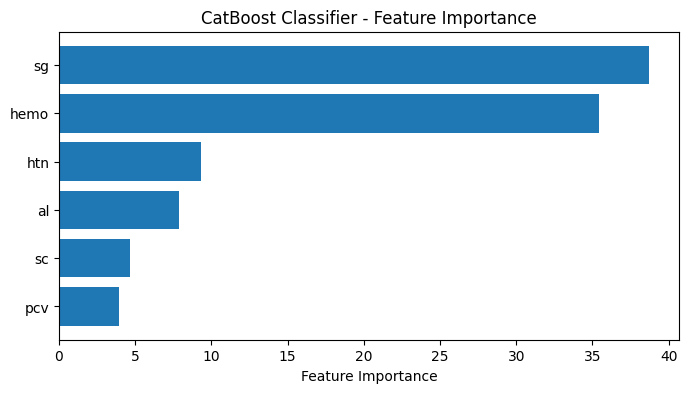

In [208]:
from catboost import CatBoostClassifier, Pool

# Build and train the CatBoost classifier
catboost_model = CatBoostClassifier(iterations=10, depth=6, learning_rate=0.1, loss_function='Logloss', random_seed=42)
catboost_model.fit(X_train, y_train)

# Evaluate the model
catboost_accuracy = catboost_model.score(X_test, y_test)

# Show the accuracy
print('CatBoost Accuracy:', catboost_accuracy)

# Saving the model
catboost_model.save_model('catboost_model.cbm')

# Optionally, you can print feature importances
feature_importances = catboost_model.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f'Feature {X.columns[i]} importance: {importance}')

# Get the names of the features
feature_names = X.columns

# Sort the features by importance
sorted_idx = feature_importances.argsort()

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('CatBoost Classifier - Feature Importance')
plt.show()


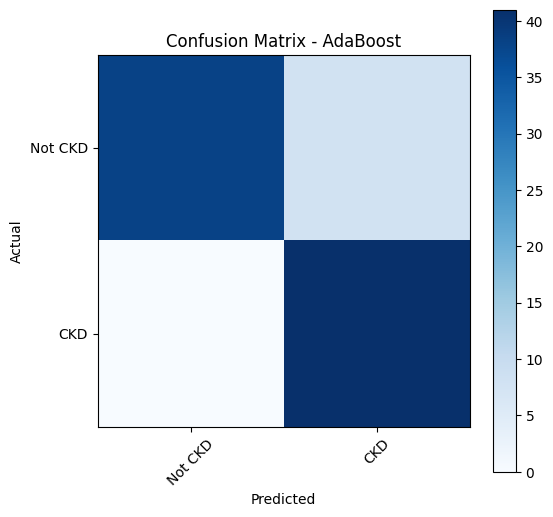

In [194]:
ab_pred = ab_model.predict(X_test)
plot_confusion_matrix(y_test, ab_pred, 'Confusion Matrix - AdaBoost')

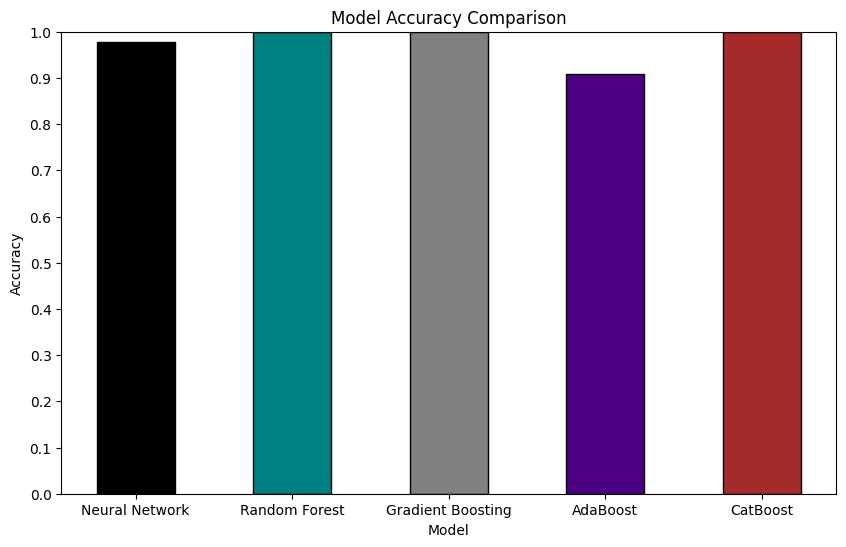

Neural Network Accuracy: 0.977011501789093
Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0
AdaBoost Accuracy: 0.9080459770114943
CatBoost Accuracy: 1.0


In [195]:
import matplotlib.pyplot as plt

# Define model names and their accuracies
model_names = ['Neural Network', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'CatBoost']
accuracies = [nn_accuracy, rf_accuracy, gb_accuracy, ab_accuracy, catboost_accuracy]

# Define custom colors for the bars
colors = ['black', 'teal', 'gray', 'indigo', 'brown']

# Create a bar chart with slim bars and custom colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=colors, width=0.5, edgecolor = 'black')  # Adjust width to make bars slimmer
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1 for accuracy

# Add more scales on the y-axis
plt.yticks([i/10 for i in range(11)])  # This will add 11 ticks from 0.0 to 1.0 in increments of 0.1

plt.show()

# Print the accuracies
for model, accuracy in zip(model_names, accuracies):
    print(f'{model} Accuracy: {accuracy}')


In [196]:
# Assuming you have already trained the models and stored them in 'rf_model', 'gb_model', and 'ab_model'

# Random Forest
rf_accuracy = rf_model.score(X_test, y_test)
print(f'Random Forest Accuracy: {rf_accuracy}')

# Gradient Boosting
gb_accuracy = gb_model.score(X_test, y_test)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

# AdaBoost
ab_accuracy = ab_model.score(X_test, y_test)
print(f'AdaBoost Accuracy: {ab_accuracy}')


Random Forest Accuracy: 1.0
Gradient Boosting Accuracy: 1.0
AdaBoost Accuracy: 0.9080459770114943


In [197]:
from sklearn.metrics import classification_report

# Assuming you have already trained and stored the models in 'rf_model', 'gb_model', 'ab_model', and 'catboost_model'

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_report = classification_report(y_test, rf_pred)
print("Random Forest Classification Report:")
print(rf_report)

# Gradient Boosting
gb_pred = gb_model.predict(X_test)
gb_report = classification_report(y_test, gb_pred)
print("\nGradient Boosting Classification Report:")
print(gb_report)

# AdaBoost
ab_pred = ab_model.predict(X_test)
ab_report = classification_report(y_test, ab_pred)
print("\nAdaBoost Classification Report:")
print(ab_report)

# CatBoost
catboost_pred = catboost_model.predict(X_test)
catboost_report = classification_report(y_test, catboost_pred)
print("\nCatBoost Classification Report:")
print(catboost_report)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        41

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        41

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87


AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.90        46
           1       0.84      1.00      0.91        41

    accuracy                           0.91        87
   macro avg    

In [198]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Assuming you have already trained and stored the models in 'rf_model', 'gb_model', 'ab_model', 'catboost_model', and 'model'

# Make predictions for all models
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ab_pred = ab_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)

# Assuming 'model' is a Keras neural network model
nn_probs = model.predict(X_test)
nn_pred = (nn_probs > 0.5).astype(int)

# Define a function to calculate metrics
def get_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, accuracy, recall, f1

# Get metrics for all models
rf_metrics = get_metrics(y_test, rf_pred)
gb_metrics = get_metrics(y_test, gb_pred)
ab_metrics = get_metrics(y_test, ab_pred)
catboost_metrics = get_metrics(y_test, catboost_pred)
nn_metrics = get_metrics(y_test, nn_pred)

# Print the metrics
print(f'{"Model":<20} {"Precision":<20} {"Accuracy":<20} {"Recall":<20} {"F1-Score":<20}')
print(f'{"Random Forest":<20} {rf_metrics[0]:<20.4f} {rf_metrics[1]:<20.4f} {rf_metrics[2]:<20.4f} {rf_metrics[3]:<20.4f}')
print(f'{"Gradient Boosting":<20} {gb_metrics[0]:<20.4f} {gb_metrics[1]:<20.4f} {gb_metrics[2]:<20.4f} {gb_metrics[3]:<20.4f}')
print(f'{"AdaBoost":<20} {ab_metrics[0]:<20.4f} {ab_metrics[1]:<20.4f} {ab_metrics[2]:<20.4f} {ab_metrics[3]:<20.4f}')
print(f'{"CatBoost":<20} {catboost_metrics[0]:<20.4f} {catboost_metrics[1]:<20.4f} {catboost_metrics[2]:<20.4f} {catboost_metrics[3]:<20.4f}')
print(f'{"Neural Network":<20} {nn_metrics[0]:<20.4f} {nn_metrics[1]:<20.4f} {nn_metrics[2]:<20.4f} {nn_metrics[3]:<20.4f}')


AttributeError: ignored

In [203]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# Assuming you have already trained and stored the models in 'rf_model', 'gb_model', 'ab_model', and 'catboost_model'

# Make predictions for all models
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)
ab_pred = ab_model.predict(X_test)
catboost_pred = catboost_model.predict(X_test)

# Define a function to calculate metrics
def get_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return precision, accuracy, recall, f1

# Get metrics for all models
rf_metrics = get_metrics(y_test, rf_pred)
gb_metrics = get_metrics(y_test, gb_pred)
ab_metrics = get_metrics(y_test, ab_pred)
catboost_metrics = get_metrics(y_test, catboost_pred)

# Print the metrics
print(f'{"Model":<20} {"Precision":<20} {"Accuracy":<20} {"Recall":<20} {"F1-Score":<20}')
print(f'{"Random Forest":<20} {rf_metrics[0]:<20.4f} {rf_metrics[1]:<20.4f} {rf_metrics[2]:<20.4f} {rf_metrics[3]:<20.4f}')
print(f'{"Gradient Boosting":<20} {gb_metrics[0]:<20.4f} {gb_metrics[1]:<20.4f} {gb_metrics[2]:<20.4f} {gb_metrics[3]:<20.4f}')
print(f'{"AdaBoost":<20} {ab_metrics[0]:<20.4f} {ab_metrics[1]:<20.4f} {ab_metrics[2]:<20.4f} {ab_metrics[3]:<20.4f}')
print(f'{"CatBoost":<20} {catboost_metrics[0]:<20.4f} {catboost_metrics[1]:<20.4f} {catboost_metrics[2]:<20.4f} {catboost_metrics[3]:<20.4f}')


Model                Precision            Accuracy             Recall               F1-Score            
Random Forest        1.0000               1.0000               1.0000               1.0000              
Gradient Boosting    1.0000               1.0000               1.0000               1.0000              
AdaBoost             0.8367               0.9080               1.0000               0.9111              
CatBoost             1.0000               1.0000               1.0000               1.0000              
